In [1]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.table import Table, join, Column
import astropy.units as u 
from astropy.coordinates import SkyCoord
from astropy.io import ascii

import astroquery
from astroquery.mast import Catalogs
from astroquery.mast import Observations
from astroquery.mast import Tesscut

import lightkurve 
from lightkurve import TessTargetPixelFile, TessLightCurveFile, TessLightCurve

import glob, re

from tools import has_data, find_in_tess

% matplotlib inline

import matplotlib as mpl
from matplotlib import rc

mpl.style.use('seaborn-colorblind')

#To make sure we have always the same matplotlib settings
#(the ones in comments are the ipython notebook settings)

mpl.rcParams['figure.figsize']=(12.0,9.0)    #(6.0,4.0)
mpl.rcParams['font.size']=18               #10 
mpl.rcParams['savefig.dpi']= 200             #72 
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12

colours = mpl.rcParams['axes.prop_cycle'].by_key()['color']


In [2]:
fname = '../data/ritter_related_binaries.csv'
catalog = Table.read(fname,delimiter='|')
catalog.rename_column('name','Name')
# bhs.rename_column('RA (h:m:s)','RA')
# for key in bhs.keys():
#     if 'DEC' in key: 
#         bhs.rename_column(key,'Dec')

In [3]:
# catalog.keys()

In [4]:
%%time
in_tess = find_in_tess(catalog,verbose=False)

/anaconda2/envs/py36/lib/python3.6/site-packages/astroquery/utils/commons.py:171: UserWarning: Coordinate string is being interpreted as an ICRS coordinate provided in degrees.
  warnings.warn("Coordinate string is being interpreted as an "


CPU times: user 32.4 s, sys: 604 ms, total: 33 s
Wall time: 5min 6s


In [7]:
in_tess.write('../data/related_in_tess.csv')

In [6]:
indices = has_data(in_tess)


0035-7230 9.332 -72.237

2114-6437 319.708 -64.420

2117-5417 320.361 -54.076

AD Men 91.129 -71.423

AH Men 92.934 -81.823

AH Pic 89.303 -59.591

AKO 9 6.020 -72.082



BB Dor 82.370 -58.913

BC Dor 86.562 -68.590

BE Oct 0.203 -77.316

BL Hyi 25.251 -67.891

CAL 83 85.892 -68.373

CAL 87 86.701 -71.157

CD Ind 318.921 -58.682

CE Gru 324.485 -43.704

CF Gru 325.346 -45.075

CI Gru 323.278 -42.481

CM Phe 5.388 -51.709

CP Tuc 348.830 -59.174

CS Ind 329.977 -68.843

CV Hyi 23.175 -65.909

EF Tuc 0.479 -67.129

J0006-6900 1.639 -69.009

J0032-7420 8.230 -74.339

J0154-5947 28.504 -59.797

J0425-5714 66.411 -57.244

J0439-6809 69.957 -68.151

J0513-6951 78.462 -69.863

J0527-6954 81.954 -69.903

J0537-7034 84.436 -70.563

J0559-5125 89.850 -51.423

J2142-6748 325.572 -67.800

N LMC 1995 81.710 -70.023

N LMC 2009a 85.184 -66.670

NGC 104-CV1 6.018 -72.083

NGC 104-CV3 6.026 -72.079

NGC 104-W1 6.070 -72.074

NGC 104-W120 6.045 -72.106

NGC 104-W15 6.035 -72.083

NGC 104-W2 6.065 -72.077

NGC 104-W21 6.032 -72.091

NGC 104-W34 6.021 -72.080

NGC 104-W71 6.044 -72.088

NGC 104-W8 6.044 -72.074

RR Pic 98.900 -62.640

RU Hor 41.531 -63.596

RZ Gru 341.800

In [9]:
in_s1s2 = in_tess[indices]
in_s1s2.write('../data/related_in_s1s2.csv')

In [12]:
in_s1s2.sort('mag1')
in_s1s2

Name,ra,dec,lim_mag1,mag1,type1,type1_flag,type2,type2_flag,orbital_period,orbital_period_flag,alt_name,lii,bii,acc_pos,type3,type3_flag,type4,type4_flag,mag1_flag,lim_mag2,mag2,mag2_flag,lim_mag3,mag3,mag3_flag,lim_mag4,mag4,mag4_flag,interval,interval2,period2,period2_flag,period3,period3_flag,period4,period4_flag,eclipse,sb,spect_type_2,spect_type_1,lim_mass_ratio,mass_ratio,mass_ratio_flag,mass_ratio_error,lim_inclination,inclination,inclination_flag,inclination_error,lim_m1,m1,m1_flag,m1_error,lim_m2,m2,m2_flag,m2_error,class,col58
str12,str10,str9,str4,float64,str2,str1,str2,str1,float64,str1,str21,float64,float64,int64,str2,str1,str2,str1,str1,str4,float64,str1,str4,float64,str1,str4,float64,str1,str7,str8,float64,str1,float64,str1,float64,str1,str2,int64,str7,str7,str4,float64,str1,float64,str4,float64,str1,float64,str4,float64,str1,float64,str4,float64,str1,float64,str25,int64
RR Pic,06 35 36.1,-62 38 24,--,12.0,Nb,--,SW,--,0.145025,--,N Pic 1925,272.3549,-25.6718,1,SH,--,--,--,--,--,12.5,--,--,1.0,--,--,--,--,--,--,0.1577,--,--,--,--,--,1?,1,--,--,--,--,--,--,--,65.0,:,--,--,0.95,:,--,--,0.4,:,--,CV NOVA LIKE,--
RZ Gru,22 47 12.0,-42 44 39,--,12.3,NL,--,UX,--,0.36,:,--,352.9969,-60.387,1,--,--,--,--,--,--,13.4,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
AH Men,06 11 44.1,-81 49 24,--,13.2,NL,--,SW,--,0.12721,--,H 0616-818,293.7816,-28.2401,1,SH,--,NS,--,--,--,14.0,--,--,--,--,--,--,--,--,--,0.1385,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
VW Hyi,04 09 11.3,-71 17 41,--,13.4,DN,--,SU,--,0.074271,--,--,284.8881,-38.1338,1,--,--,--,--,--,--,14.0,--,--,9.5,--,--,8.5,--,28,183,0.077,--,--,--,--,--,--,1,M4/5,--,--,6.8,--,0.2,--,--,--,--,--,0.67,--,0.22,--,0.11,--,0.03,CV DWARF NOVA SU UMA TYPE,--
2117-5417,21 21 26.6,-54 04 34,--,13.7,NL,--,--,--,0.1545,--,--,342.7733,-43.404,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
BB Dor,05 29 28.7,-58 54 46,--,14.0,NL,--,SW,--,0.154095,--,0528-5857,267.4984,-33.46,1,SH,--,--,--,--,--,--,--,--,19.3,--,--,--,--,--,--,0.1632,--,--,--,--,--,--,2,M3-4/5,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
TW Pic,05 34 50.7,-58 01 41,--,14.1,NL,--,VY,?,0.265,:,H 0534-581,266.4236,-32.7784,1,SH,?,--,--,--,--,15.9,--,--,18.1,--,--,--,--,--,--,0.253,:,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
AH Pic,05 57 12.7,-59 35 26,--,14.3,NL,--,UX,--,0.14095,--,0556-5935,268.3375,-29.924,1,SW,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,1,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,CV NOVA LIKE,--
BL Hyi,01 41 00.3,-67 53 28,--,14.3,NL,--,AM,--,0.078915,--,H 0139-68,295.9228,-48.557,1,--,--,--,--,--,--,16.4,--,--,17.0,--,--,17.6,--,--,--,--,--,--,--,--,--,--,1,M5/5,--,--,--,--,--,--,70.0,--,10.0,--,--,--,--,--,--,--,--,CV AM HER (POLAR),--


### Sweet! Nova remnant RR Pic is 12th mag - this should be an easy win! 

In [120]:
fname_data = '../data/tess-s0001-4-3_98.89792_-62.63889_10x15_astrocut.fits' # sector 1 
fname_data = '../data/tess-s0002-4-4_98.89792_-62.63889_10x15_astrocut.fits' # sector 2  

In [121]:
tpf = TessTargetPixelFile.from_fits(fname_data)

/anaconda2/envs/py36/lib/python3.6/site-packages/lightkurve/targetpixelfile.py:247: LightkurveWarning: `TargetPixelFile.from_fits()` is deprecated and will be removed soon, please use `lightkurve.open()` instead.
  LightkurveWarning)


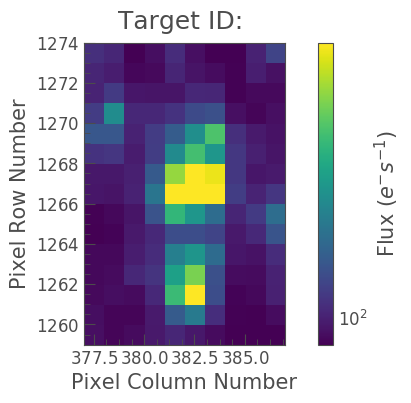

In [122]:
tpf.plot(frame=1,scale='log')


In [131]:
npix = 2.75
cen = [0.0,0.25]

newmask = np.ones((tpf.flux.shape[1],tpf.flux.shape[2]),dtype='bool')
xx, yy = np.meshgrid(np.arange(newmask.shape[0]),np.arange(newmask.shape[1]))
rr = np.sqrt((xx-newmask.shape[0]/2-cen[0])**2 + (yy-newmask.shape[1]/2-cen[1])**2)

newmask[(rr>npix).T] = False
newmask[(rr<npix).T] = True


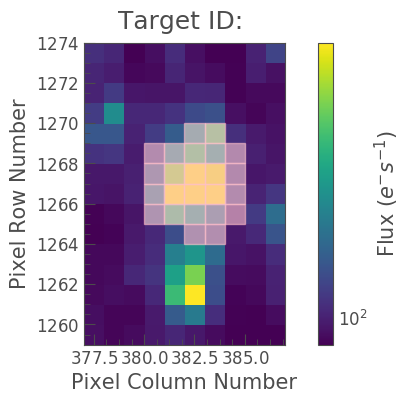

In [132]:
tpf.plot(frame=1,scale='log',aperture_mask=newmask)


In [133]:
lc = tpf.to_lightcurve(aperture_mask=newmask)
lc.primary_header = tpf.hdu[0].header
lc.data_header = tpf.hdu[1].header


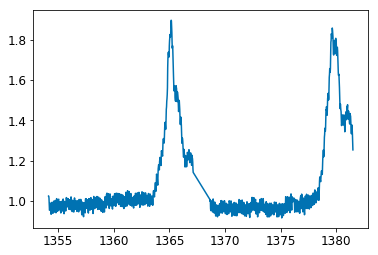

In [134]:
plt.plot(lc.time, lc.flux/np.nanmedian(lc.flux),'-')
# plt.ylim(0.925,1.05)
# plt.xlim(1355,1356)

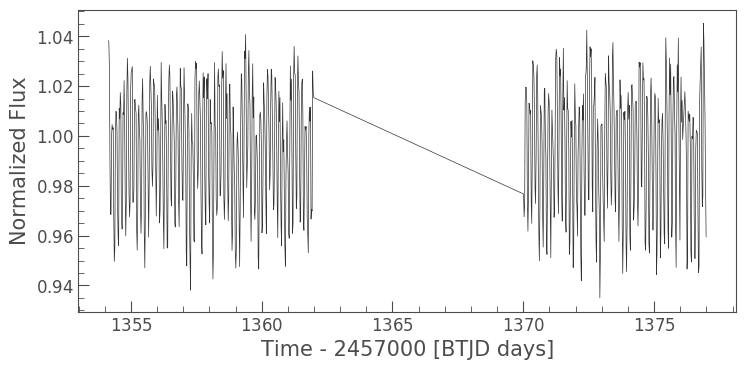

In [135]:
timerange = (1354,1362,1370,1377)
lctest = lc[(lc.time>timerange[0])*(lc.time<timerange[1]) + ((lc.time>timerange[2])*(lc.time<timerange[3]))]
lctest = lctest.flatten()
lctest.plot()

In [136]:
pg = lctest.to_periodogram()

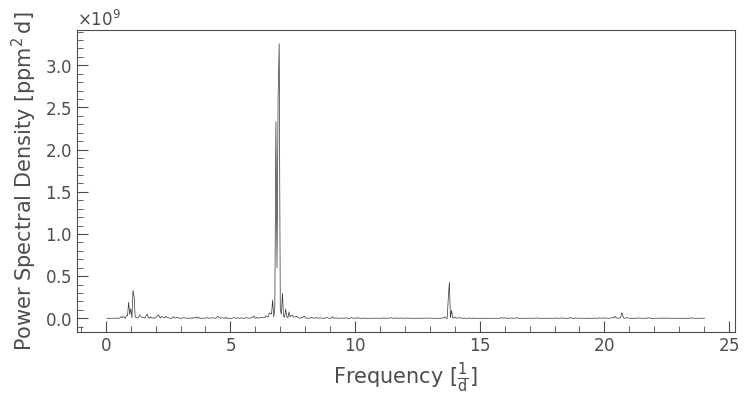

In [137]:
pg.plot()

In [138]:
period = (1./pg.frequency_at_max_power)
period.to('hour')

<Quantity 3.44972546 h>

In [139]:
from astropy.stats import LombScargle

In [140]:
frequency = np.linspace(6.5,7.25,10000)
periodogram = LombScargle(lctest.time,lctest.flux,lctest.flux_err).power(frequency)

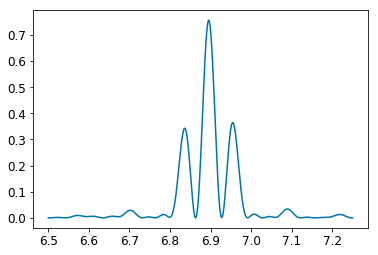

In [141]:
plt.plot(frequency,periodogram)

In [142]:
dummy = LombScargle(lctest.time,lctest.flux,lctest.flux_err,nterms=3)

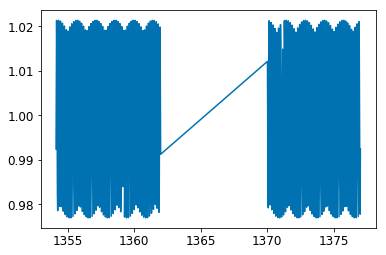

In [143]:
model= (dummy.model(lctest.time,pg.frequency_at_max_power.value))
plt.plot(lctest.time,model)

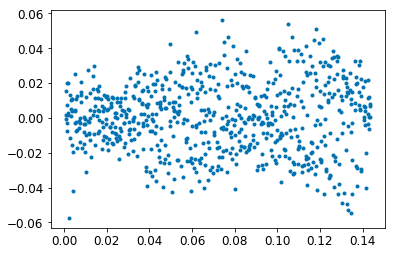

In [144]:
plt.plot(lctest.time % period.value,lctest.flux-model,'.')

In [145]:
periodogram_resid = LombScargle(lctest.time,lctest.flux-model+1.,lctest.flux_err).power(frequency)

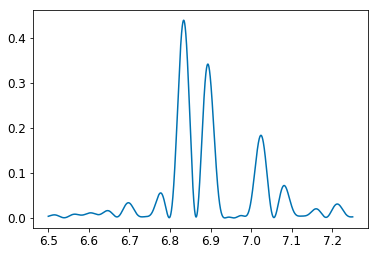

In [146]:
plt.plot(frequency,periodogram_resid)

In [109]:
tpf.camera

4